In [5]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline

model_id = "CompVis/stable-diffusion-v1-4"

#model_path = "C:\\projects\\stable-diffusion-web\\stable-diffusion\\models\\ldm\\stable-diffusion-v1\\model\\model.ckpt"

with open("/home/filippo/hugging_face_token.txt","r") as f:
    token = f.read()

image_pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", use_auth_token=token)
image_pipe.to("cuda")

Downloading:   0%|          | 0.00/14.9k [00:00<?, ?B/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.2.4",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [6]:
prompt = "Symmetry!! portrait of perseus, greek mythology, ancient greece, intricate, elegant, highly detailed, cinematic lighting, digital art, digital painting, artstation, concept art, sharp focus, illustration, art by artgerm and greg rutkowski and alphonse mucha, 8 k"

0it [00:00, ?it/s]

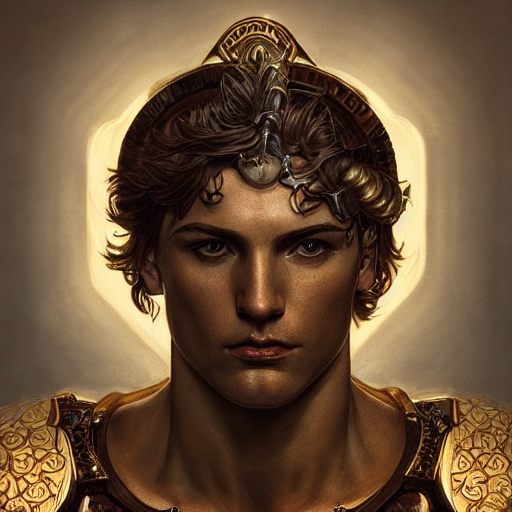

In [7]:
n_steps=50 
generator = None #torch.Generator("cuda").manual_seed(1024)

with autocast("cuda"): # autocast helps improve runtime performance by automatically casting down data to 16-bit for some computations
  image = image_pipe(prompt, num_inference_steps=n_steps, generator=generator)["sample"][0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

# Now to display an image you can do either save it such as:
# image.save(f"astronaut_rides_horse.png")


image